**생선 분류 문제**

In [59]:
# 도미 데이터

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0,
                500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
                610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0,
                714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

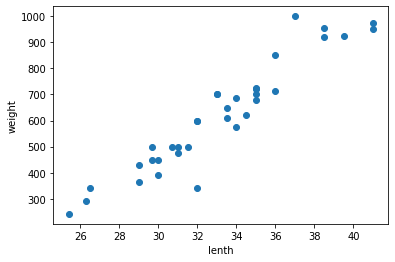

In [60]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.xlabel('lenth')
plt.ylabel('weight')
plt.show()
# 길이가 길면 무게가 많이 나가는 선형적인 관계 
# 선형적인 관계, 상관관계가 있다. (=> 연관성) => 피어슨 상관계수 (두 변수가 수치형 일때)
# 순서형 (범주형 데이터) => 켄달, 스피어만의 상관계수


In [61]:
# 방어 데이터

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,
                13.4, 12.2, 19.7, 19.9]

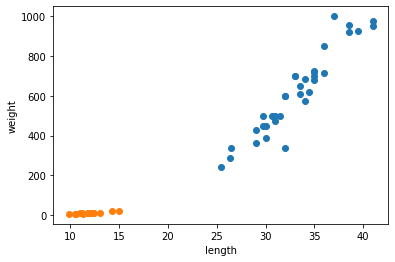

In [62]:
# 도미와 방어 데이터 병합한 산점도

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [63]:
# 두 리스트 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [64]:
# 2차원 리스트로 변환

fish_data = [[i, w] for i , w in zip(length, weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [65]:
# 타겟(레이블) 설정
fish_target = [1] * 35 + [0] * 14
print(fish_target)


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


**K-최근접 이웃 (K-Nearest Neighbor) 알고리즘을 이용한 분류**

비모수방식이며 instance-based 알고리즘

In [66]:
#사이킷런의 K-최근접이웃 클래스 
from sklearn.neighbors import KNeighborsClassifier

In [67]:
# KNeighboersClass 객체 생성
kn = KNeighborsClassifier()

In [70]:
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

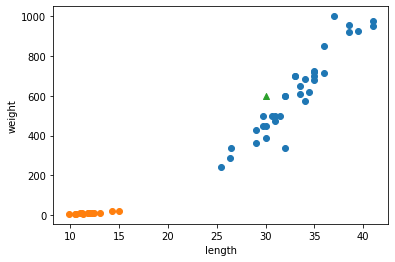

In [71]:
# 정확도(accuracy)
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [72]:
kn.predict([[30, 600],[50,550], [5,20]])

array([1, 1, 0])

In [73]:
# fit_X : fish_data를 가지고 있음
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [74]:
# _y : fish_targer을 가지고 있음
print(kn._y)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [75]:
# K-neighbors 크기 지정

kn49 = KNeighborsClassifier(n_neighbors=49)

In [76]:
# K=49인 경우 모델 훈련 및 성능

kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [77]:
#49개 중 도미가 35개 이므로 어떤 데이터를 넣어도 무조건 도미로 예측

print(35/49)

0.7142857142857143


In [81]:
#  확인문제 


kn =KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for k in range(5, 50):
    #최근접 이웃 개수 설정
    kn.n_neighboers = k
    #점수 계산
    score = kn.score(fish_data, fish_target)
    if score < 1:
        print(k, score)
        break

In [82]:
# 훈련 세트와 테스트 세트 
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
               31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
               34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
               38.5, 38.5, 39.5, 41.0, 41.0, 
               9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
               12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0,
               475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0,
               575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0,
               920.0, 955.0, 925.0, 975.0, 950.0, 
               6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [84]:
fish_data = [[l,w]for l,w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [86]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [87]:
# 훈련 데이터셋과 테스트 데이터셋으로 분리 

train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]


In [88]:
# 학습 및 평가
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

# 편향된 데이터 셋 구성 때문에

0.0

In [89]:
print(train_target)
print(test_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [90]:
# 올바른 훈련 데이터와 테스트 데이터 구성하기
import numpy as np

In [91]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [92]:
print(input_arr)


[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [93]:
print(input_arr.shape)

(49, 2)


In [94]:
# 데이터 섞기
np.random.seed(42)
index = np.arange(49)
print(index)
np.random.shuffle(index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


In [95]:
print(index)


[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [96]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [97]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [98]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]


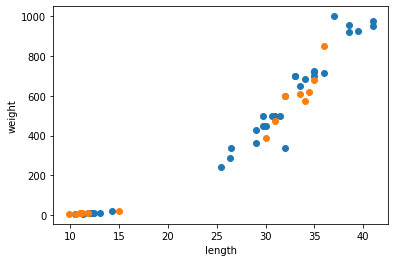

In [99]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [101]:
# 두번째 머신러닝 프로그램
kn.fit(train_input, train_target)
kn.score(test_input, test_target)
print(test_input)
kn.predict(test_input)
test_target


[[ 10.6   7. ]
 [  9.8   6.7]
 [ 35.  680. ]
 [ 11.2   9.8]
 [ 31.  475. ]
 [ 34.5 620. ]
 [ 33.5 610. ]
 [ 15.   19.9]
 [ 34.  575. ]
 [ 30.  390. ]
 [ 11.8   9.9]
 [ 32.  600. ]
 [ 36.  850. ]
 [ 11.    9.7]]


array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [102]:
# 넘파이로 데이터 준비하기
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [103]:
import numpy as np

In [104]:
# 두 리스트 열방향으로 합치기 : 2차원 배열로

fish_data = np.column_stack((fish_length, fish_weight))

In [105]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [106]:
# 라벨 데이터

fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [107]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [109]:
# 사이킷런으로 훈련 데이터와 테스트 데이터 나누기

from sklearn.model_selection import train_test_split

In [110]:
test_input.shape

(14, 2)

In [111]:
train_target.shape

(35,)

In [112]:
train_target

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [113]:
# 데이터 분할


train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state=42)


In [114]:
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [115]:
# 성능 평가 및 테스트

from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [116]:
# 도미 데이터 : 길이 25, 무게 150에 대한 분류 결과

print(kn.predict([[25, 150]]))

[0.]


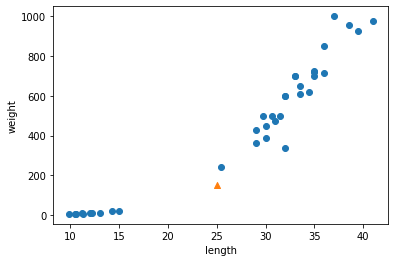

In [117]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(25, 150, marker = "^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [118]:
dist, idx = kn.kneighbors([[25,150]])

In [119]:
print(idx)

[[21 33 19 30  1]]


In [120]:
print(dist)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [121]:
# 두 변수의 스케일을 갖게

# 표준점수 (Z-Score)

mean = np.mean(train_input, axis = 0)
print(mean)

[ 27.29722222 454.09722222]


In [122]:
std = np.std(train_input, axis = 0)
print(std)

[  9.98244253 323.29893931]


In [123]:
train_scaled = (train_input-mean) / std
print(train_scaled[:10])

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]]


In [124]:
# 데이터도 스케일링
new = ([25,150]-mean) / std
print(new)

[-0.23012627 -0.94060693]


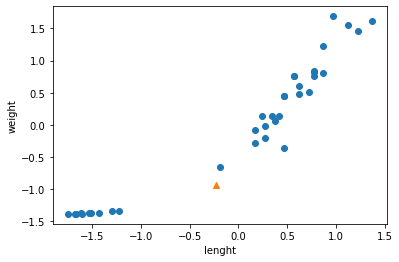

In [125]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

In [126]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [127]:
test_scaled = (test_input - mean ) / std

In [128]:
kn.score(test_scaled, test_target)

1.0

In [129]:
kn.predict([new])

array([1.])

In [130]:
kn.kneighbors([new])

(array([[0.2873737 , 0.7711188 , 0.89552179, 0.91493515, 0.95427626]]),
 array([[21, 14, 34, 32,  5]]))

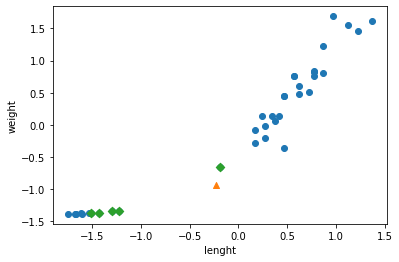

In [131]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[idx,0], train_scaled[idx,1], marker="D")
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()